
<br>
Created on Fri Feb 26 13:48:10 2021<br>
@author: Ganesh<br>


Load the Dataset

Load libraries

In [1]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
#df = pd.read_csv('D:/datatrained_project/titanic/titanic_train.csv')
df1 = pd.read_csv('D:/datatrained_project/practice projects/titanic/titanic_train.csv')
df = pd.DataFrame(df1)
print("\n Have a look into records", df.head(10))

Using TensorFlow backend.



 Have a look into records    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy

column and data type

In [2]:
print("\n Column and Data Type", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Column and Data Type None


shape of data type

In [3]:
print("\n Shape of Dataset", df.shape)


 Shape of Dataset (891, 12)


stats of dataset

In [4]:
print("\n Describe the Data ", df.describe())


 Describe the Data         PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Survived class is having only two attribute

In [5]:
print("\n Unique value in Class ", df["Survived"].unique())


 Unique value in Class  [0 1]


Class distribution for not survived and survived

In [6]:
print("\n Count of the class for not survived and survived", df['Survived'].value_counts())


 Count of the class for not survived and survived 0    549
1    342
Name: Survived, dtype: int64


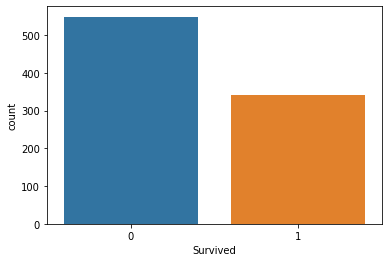

In [7]:
sns.countplot(x='Survived',data = df)

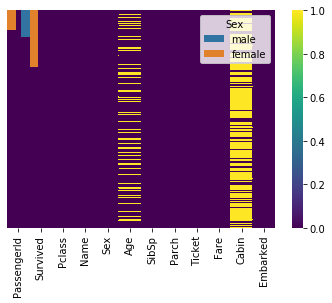

In [8]:
sns.countplot(x='Survived', hue = 'Sex', data = df)
df.info
sns.heatmap(df.isnull(), yticklabels = False, cmap ='viridis' )

Nan value in df      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4       

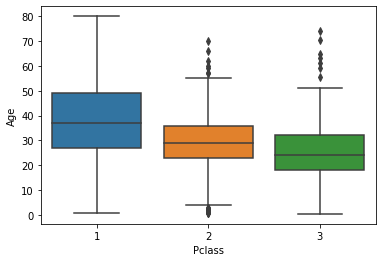

In [9]:
sns.boxplot(x='Pclass', y= 'Age', data = df)
df.head(5)
df.drop(['Cabin','Name','Ticket'], axis = 1, inplace = True)
print("Nan value in df",df)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
sex = pd.get_dummies(df['Sex'] , drop_first = True)
print(sex.head(5))
df.columns
embarked = pd.get_dummies(df['Embarked'] , drop_first = True)
pclass = pd.get_dummies(df['Pclass'] , drop_first = True)
print(df.info)

   male
0     1
1     0
2     0
3     0
4     1
<bound method DataFrame.info of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
885          886         0       3  female  39.0      0      5  29.1250   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0   

histograms

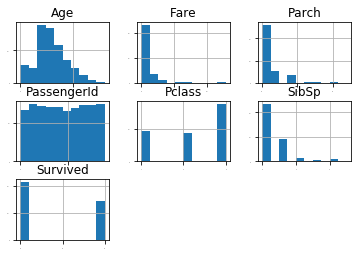

In [13]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

ns.pairplot(df, hue='Pclass',diag_kind='kde')

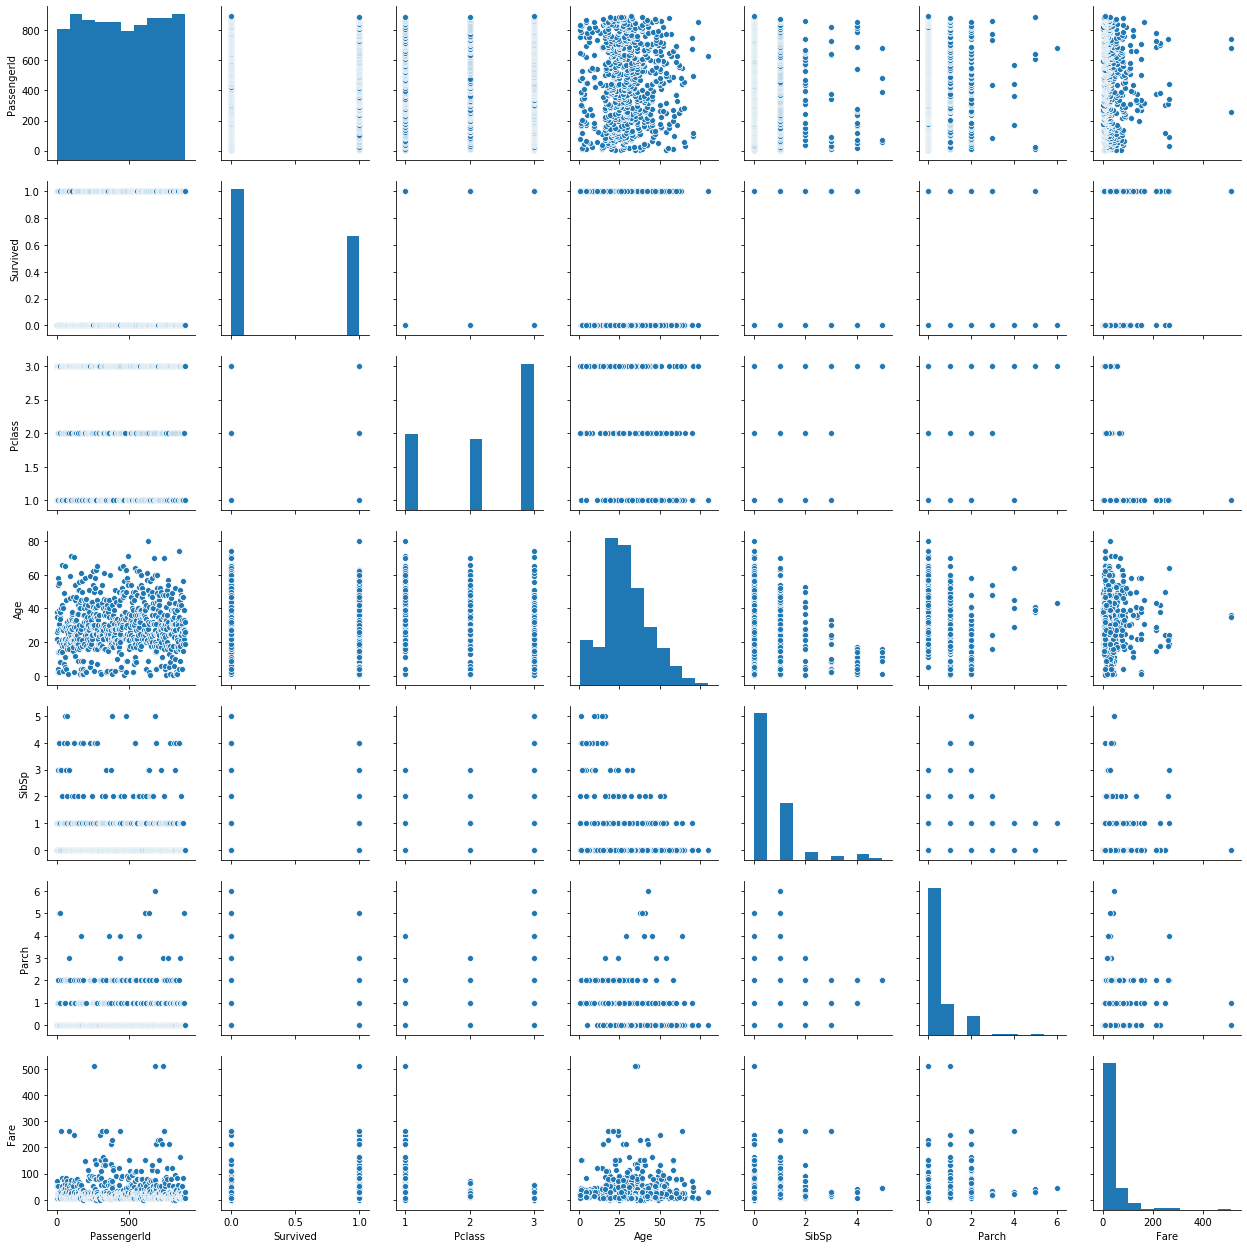

In [14]:
sns.pairplot(df)
df = pd.concat([df,sex,embarked,pclass], axis = 1)

In [15]:
df.columns

Index(['PassengerId',    'Survived',      'Pclass',         'Sex',
               'Age',       'SibSp',       'Parch',        'Fare',
          'Embarked',        'male',           'Q',           'S',
                   2,             3],
      dtype='object')

In [16]:
df.drop(['Sex','Embarked','Pclass','PassengerId'], axis = 1, inplace = True)

In [17]:
df.head(5)
df.corr()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.048966,-0.159015,0.086891,-0.335364
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.021693,-0.025431,0.009214,-0.309944
SibSp,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.106296,0.051331,0.018968,-0.052570,0.077060
Parch,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.009417,0.013259,-0.018558,0.027750
Fare,0.266100,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.062346,-0.250994,-0.140246,-0.402219
male,-0.536762,0.099037,-0.106296,-0.249543,-0.182457,1.000000,-0.027256,0.109078,-0.075347,0.158446
Q,-0.048966,-0.021693,0.051331,-0.009417,-0.062346,-0.027256,1.000000,-0.378859,-0.080929,0.145087
S,-0.159015,-0.025431,0.018968,0.013259,-0.250994,0.109078,-0.378859,1.000000,0.168577,0.093140
2,0.086891,0.009214,-0.052570,-0.018558,-0.140246,-0.075347,-0.080929,0.168577,1.000000,-0.564948
3,-0.335364,-0.309944,0.077060,0.027750,-0.402219,0.158446,0.145087,0.093140,-0.564948,1.000000


Multimodal Data Visualizations

correlation matrix

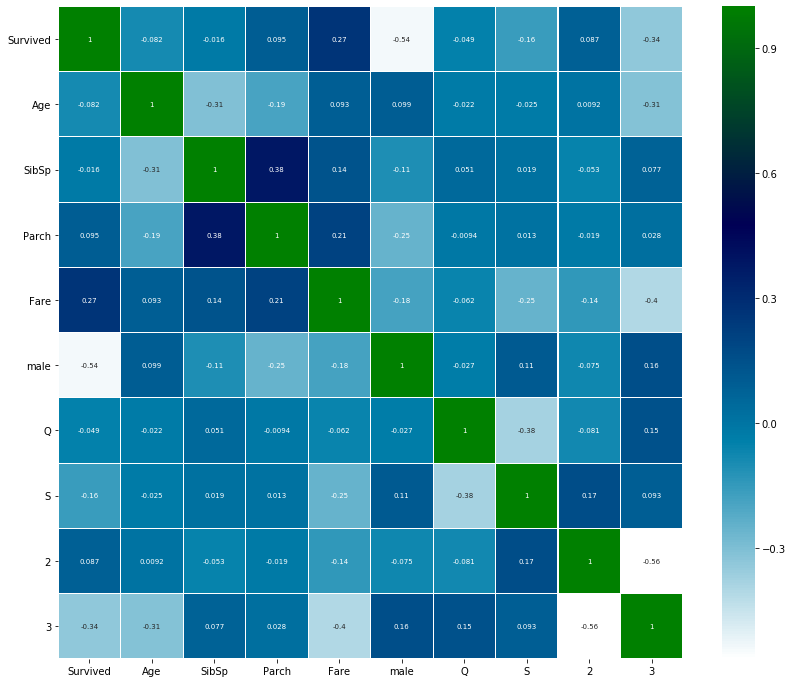

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="ocean_r", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

Split dataset into train and test 

In [19]:
array = df.values
X = array[:,1:11]
Y = array[:,0]
test_size = 0.30
seed = 80

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)

Test options and evaluation metric

In [21]:
num_folds = 6
seed = 80
scoring = 'accuracy'

Spot-Check Algorithms

In [22]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.771084 (0.028680)
LDA: 0.779116 (0.015027)
KNN: 0.678715 (0.050958)
CART: 0.732932 (0.049878)
NB: 0.755020 (0.045437)
SVM: 0.692771 (0.041591)


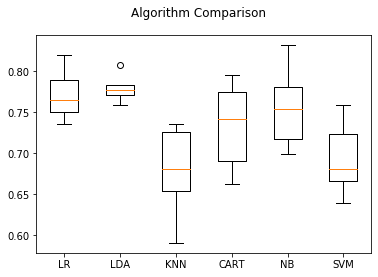

In [23]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Evaluate Algorithms: Standardize/Normalize data

to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines<br>
that standardize the data and build the # model for each fold in the cross-validation test harness.<br>
That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

Standardize the dataset

In [24]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

In [25]:
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

ScaledLR: 0.771084 (0.021997)
ScaledLDA: 0.779116 (0.015027)
ScaledKNN: 0.767068 (0.022718)
ScaledCART: 0.724900 (0.036422)
ScaledNB: 0.755020 (0.045437)
ScaledSVM: 0.785141 (0.041977)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Compare Algorithms

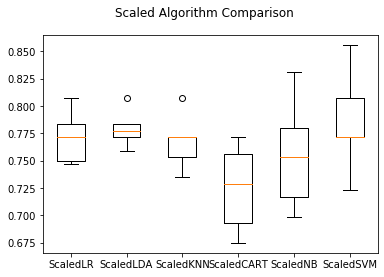

In [26]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

After investigate tuning the parameters for the algorithm that show promise from<br>
In the spot-checking highest score is for : SVM.<br>
Tuning SVM<br>
tune two key parameters of the SVM algorithm, the value of C (how much to relax the<br>
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial<br>
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid<br>
search using 10-fold cross-validation with a standardized copy of the training dataset. We will<br>
try a number of simpler kernel types and C values with less bias and more bias (less than and<br>
more than 1.0 respectively).

Tune scaled SVM

In [27]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best: 0.791165 using {'C': 0.1, 'kernel': 'rbf'}
0.771084 (0.018404) with: {'C': 0.1, 'kernel': 'linear'}
0.722892 (0.040560) with: {'C': 0.1, 'kernel': 'poly'}
0.791165 (0.036588) with: {'C': 0.1, 'kernel': 'rbf'}
0.775100 (0.020478) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.771084 (0.018404) with: {'C': 0.3, 'kernel': 'linear'}
0.763052 (0.043810) with: {'C': 0.3, 'kernel': 'poly'}
0.769076 (0.035752) with: {'C': 0.3, 'kernel': 'rbf'}
0.744980 (0.032191) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.771084 (0.018404) with: {'C': 0.5, 'kernel': 'linear'}
0.781124 (0.040808) with: {'C': 0.5, 'kernel': 'poly'}
0.779116 (0.037887) with: {'C': 0.5, 'kernel': 'rbf'}
0.702811 (0.032379) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.771084 (0.018404) with: {'C': 0.7, 'kernel': 'linear'}
0.779116 (0.035921) with: {'C': 0.7, 'kernel': 'poly'}
0.779116 (0.040956) with: {'C': 0.7, 'kernel': 'rbf'}
0.662651 (0.058613) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.771084 (0.018404) with: {'C': 0.9, 'kernel': 'linear'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

#########Ensemble Methods###########

evaluate four different ensemble machine learning<br>
algorithms, two boosting and two bagging methods:<br>
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ensembles

In [28]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.765060 (0.040411)
GBM: 0.789157 (0.028469)
RF: 0.773092 (0.029852)
ET: 0.738956 (0.035241)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Finalize model<br>
SVM showed the most promise as a low complexity and stable model for this problem. In<br>
so Finalize the model by training it on the entire training dataset and make<br>
predictions for the hold-out validation dataset to confirm

prepare the model

In [29]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8457943925233645
[[125   8]
 [ 25  56]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       133
         1.0       0.88      0.69      0.77        81

    accuracy                           0.85       214
   macro avg       0.85      0.82      0.83       214
weighted avg       0.85      0.85      0.84       214

